# Solving the Hamiltonian in different Ways



## Generating an XXZ Hamiltonian

### What is the XXZ Hamiltonian?

We first must generate some XXZ Hamiltonian. This describes the total energy of all of the 'spin-arrows'. 

- The XX part describes the tendency of neighbouring spins to align in the horizontal (x) and vertical (y) directions. This interaction is isotropic.
- THE Z part describes the interaction strength between spins in the "up/down" (z) direction.

The whole Hamiltonian is

$$H = J \sum_{i=1}^{L-1} (S_i^xS^x_{i+1} + S^y_iS^y_{i+1} + \Delta S^z_i S^z_{i+1})$$

- $J$ is the **coupling constant**. If $J>0$ then neighbouring spins like to point in opposite directions (antiferromagnetic). If $J<0$ then neighbouring spins like to point in the same direction (ferromagnetic). 
- The sum means that we sum over all adjacent pairs of sites, from site 1 and 2, up to site $L-1$ and $L$. This describes an "open chain". 
- $S^x_i$ is the component of spin in the $x$-direction at site $i$, and so on.
- $\Delta$ is the **anisotropy parameter**, which tunes the strength of the $z$ interaction.

For a spin-1/2 system, the spin operators are represented by the Pauli matrices i.e.

$$S^x = \frac{1}{2} \begin{pmatrix}0 & 1 \\ 1 & 0 \end{pmatrix}, \quad S^y = \frac{1}{2} \begin{pmatrix}0 & -i \\ i & 0 \end{pmatrix}, \quad S^z = \frac{1}{2} \begin{pmatrix}1 & 0 \\ 0 & 1 \end{pmatrix}$$

### Building the full Hamiltonian

The real challenge is constructing the Hamiltonian for $L$ spins - the total system size is $2^L \times 2^L$ which grows fast with $L$. 

To get an operator that acts only on site $i$, we need the tensor product. For example, the operator $S^z_i$ for a 3-spin ($L=3$) chain is 

$$S^z_1 = S^z \otimes I \otimes I, \quad S^z_2 = I \otimes S^z \otimes I, \quad S^z_3 = I \otimes I \otimes S^z \\$$

In [78]:
using LinearAlgebra

function get_xxz_hamiltonian(L::Int, J::Float64, Δ::Float64)
    """
    Constructs the Hamiltonian for the XXZ spin chain model with L sites, coupling constant J, and anisotropy parameter Δ.
    """
    dim = 2^L

    # define the pauli matrices we need
    sx = [0.0 1.0; 1.0 0.0] # pauli X
    sy = [0.0 -im; im 0.0] # pauli Y
    sz = [1.0 0.0; 0.0 -1.0] # pauli Z
    id = I(2) # 2D identity from LinearAlgebra

    # init as a zero matrix
    H = zeros(ComplexF64, dim, dim)

    # now we can construct the hamiltonian (i.e. fill it with the right values)
    # loop over all the sites 0 to L-1
    for i in 1:L-1
        j = i + 1 # j is the adjacent site to i (to the right)

        # we need to construct the full terms for each interaction
        term_xx = 1.0
        term_yy = 1.0
        term_zz = 1.0

        for site in 1:L
            if site == i
                # if we are on the ith site, we want to add the sx, sy, sz terms
                term_xx = kron(term_xx, sx)
                term_yy = kron(term_yy, sy)
                term_zz = kron(term_zz, sz)
            elseif site == j 
                # if we are on the jth site, we want to add the sx, sy, sz terms
                term_xx = kron(term_xx, sx)
                term_yy = kron(term_yy, sy)
                term_zz = kron(term_zz, sz)
            else
                # otherwise we add the identity
                term_xx = kron(term_xx, id)
                term_yy = kron(term_yy, id)
                term_zz = kron(term_zz, id)
            end
        end

        # now we can add these terms to the hamiltonian
        H += J * term_xx + J * term_yy + Δ * term_zz
    end

    return H
end


get_xxz_hamiltonian (generic function with 1 method)

#### Note - what does `kron` do?
`kron(a,b)` computes the Kroenecker product of two vectors/matrices/numbers. 

In [79]:

test_hamiltonian = get_xxz_hamiltonian(4, 1.0, 1.5)
display(real(test_hamiltonian))
eigens = eigen(test_hamiltonian)
eigenvalues = eigens.values
display(eigenvalues)
ground_state = minimum(eigenvalues)
println("Ground state energy: $ground_state\n")

16×16 Matrix{Float64}:
 4.5  0.0   0.0  0.0   0.0   0.0   0.0  …   0.0   0.0  0.0   0.0  0.0  0.0
 0.0  1.5   2.0  0.0   0.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0
 0.0  2.0  -1.5  0.0   2.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  1.5   0.0   2.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0
 0.0  0.0   2.0  0.0  -1.5   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  2.0   0.0  -4.5   2.0  …   0.0   0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0   0.0   2.0  -1.5      2.0   0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0   0.0   0.0   0.0      0.0   2.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0   2.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0   0.0   2.0   0.0      2.0   0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0   0.0   0.0   2.0  …  -4.5   0.0  2.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0   0.0   0.0   0.0      0.0  -1.5  0.0   2.0  0.0  0.0
 0.0  0.0   0.0  0.0   0.0   0.0   0.0      2.0   0.0  1.5   0.0  0.0  0.0
 0

16-element Vector{Float64}:
 -7.574673582515121
 -5.105551275463986
 -4.201562118716412
 -4.2015621187164065
 -1.4999999999999916
 -1.0615528128088285
 -1.0615528128088196
  0.38679098625037467
  2.1055512754639887
  2.201562118716424
  2.201562118716426
  2.687882596264753
  3.0615528128088303
  3.0615528128088303
  4.5
  4.5

Ground state energy: -7.574673582515121



### Issues with this

This is very slow... For $L=100$, the number of states is larger than the number of atoms in the universe, which cannot be stored on any computer.

## Density Matrix Renormalization Group (DMRG)

The core idea behind DMRG is to focus only on what's important, and forget everything else. But what does imporatant actually mean?

We use a **density matrix**, which tells us how strongly one part of the system is entangled with another. By analysing the density matrix, DMRG can make a very intelligent decision about which states to discard. 

### How it works

DMRG builds a spin chain iteratively, growing the system and refining its description at each step. 

In [111]:
# first we need a function to generate a MPS representation of the ground state
using ITensors 
using ITensorMPS

function create_MPS(L::Int, Χ::Int)
    """Create a random MPS for a spin-1/2 chain of length L with bond dimension Χ."""
    # create a site set for a spin-1/2 chain
    sites = siteinds("S=1/2", L; conserve_qns=true) # conserve total Sz

    # create a random MPS with bond dimension Χ
    init_state = [isodd(i) ? "Up" : "Dn" for i = 1:L] # generic ground state
    ψ0 = randomMPS(sites, init_state)
    return ψ0, sites
end

create_MPS (generic function with 1 method)

In [116]:
using LightGraphs
using Graphs, GraphPlot

function generate_adjacency_matrix(L::Int, p::Float64)
    """
    Generate the adjacency matrix for a 1D chain of length L, where each node is connected to every other with probability p.
    """
    G = LightGraphs.erdos_renyi(L, p) # start with no edges
    return LightGraphs.adjacency_matrix(G)
end

function plot_adjacency_matrix(adj_mat)
    """
    Plot the graph represented by the adjacency matrix.
    """
    G = Graphs.SimpleGraph(adj_mat)
    p = GraphPlot.gplot(G)
    display(p)
    return p
end

plot_adjacency_matrix (generic function with 1 method)

In [ ]:
#! Get's error Flux Size doesn't match (or something)
function get_xxz_hamiltonian_itensor(sites, adj_mat, J::Float64, Δ::Float64)
    """
    Constructs the Hamiltonian for the XXZ spin chain model using ITensors, given a site set and an adjacency matrix.
    """
    L = length(sites)
    
    terms = ITensor[]

    for j in 1:L-1
        if adj_mat[j, j+1] == 1
            sj_x = op("Sx", sites, j)
            sjp1_x = op("Sx", sites, j+1)
            push!(terms, J * sj_x * sjp1_x)
            sj_y = op("Sy", sites, j)
            sjp1_y = op("Sy", sites, j+1)
            push!(terms, J * sj_y * sjp1_y)
            sj_z = op("Sz", sites, j)
            sjp1_z = op("Sz", sites, j+1)
            push!(terms, Δ * sj_z * sjp1_z)
        end
    end 
    H = sum(terms)
    return H
end

get_xxz_hamiltonian_itensor (generic function with 2 methods)

In [ ]:
# from ASH - XXZ Hamiltonian as an MPO. Not sure why mine didn't work in comparison to this
function create_XXZ_Ham_MPO(Nodes, adj_mat, Δ, sites)
    ampo = OpSum()
    for i=1:Nodes
        for j = i+1:Nodes
            ampo += 4*adj_mat[i,j]*Δ, "Sz",i,"Sz",j
            ampo += -2*adj_mat[i,j],"S+",i,"S-",j
            ampo += -2*adj_mat[i,j],"S-",i,"S+",j
        end
    end
    H = MPO(ampo, sites)
    return H
end

create_XXZ_Ham_MPO (generic function with 1 method)

4×4 SparseArrays.SparseMatrixCSC{Int64, Int64} with 8 stored entries:
 ⋅  ⋅  1  ⋅
 ⋅  ⋅  1  1
 1  1  ⋅  1
 ⋅  1  1  ⋅

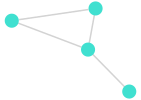

After sweep 1 energy=-6.407952484106732  maxlinkdim=2 maxerr=0.00E+00 time=0.005
After sweep 2 energy=-7.999999999999909  maxlinkdim=4 maxerr=0.00E+00 time=0.004
After sweep 3 energy=-7.999999999999998  maxlinkdim=4 maxerr=0.00E+00 time=0.003
After sweep 4 energy=-7.999999999999999  maxlinkdim=4 maxerr=0.00E+00 time=0.002
After sweep 5 energy=-7.999999999999999  maxlinkdim=4 maxerr=0.00E+00 time=0.002
After sweep 6 energy=-7.999999999999999  maxlinkdim=4 maxerr=0.00E+00 time=0.002
After sweep 7 energy=-7.999999999999999  maxlinkdim=4 maxerr=0.00E+00 time=0.003
After sweep 8 energy=-7.999999999999999  maxlinkdim=4 maxerr=0.00E+00 time=0.002
After sweep 9 energy=-8.0  maxlinkdim=4 maxerr=0.00E+00 time=0.002
After sweep 10 energy=-7.999999999999998  maxlinkdim=4 maxerr=0.00E+00 time=0.003
Ground state energy from DMRG: -7.999999999999998


In [160]:
# parameters
N = 4 # length of the spin chain i.e. number of nodes
Χ = 1000 # bond dimension
J = 1.0 # coupling constant
Δ = 1.5 # anisotropy parameter
p = 0.5 # probability of entanglement

# DMRG parameters
sweeps = Sweeps(10)
setmaxdim!(sweeps, Χ)
setcutoff!(sweeps, 1E-14)

ψ0, sites = create_MPS(N, Χ)
adj_mat = generate_adjacency_matrix(N, p)
display(adj_mat)
plot_adjacency_matrix(adj_mat)
H = create_XXZ_Ham_MPO(N, adj_mat, Δ, sites)
E, ψ = dmrg(H, ψ0, sweeps)
println("Ground state energy from DMRG: $E")

# How much faster is it? 

Should compare the results for the chain of atoms as the exact diagonalisation does.

In [148]:
function generate_chain_adjacency_matrix(N::Int)
    """
    Generate adjacency matrix for a 1D chain with N nodes and nearest-neighbor connections only.
    Returns a symmetric N×N matrix where adj_mat[i,j] = 1 if nodes i and j are connected.
    """
    adj_mat = zeros(Int, N, N)
    
    # connect each node to its nearest neighbors
    for i in 1:N-1
        adj_mat[i, i+1] = 1  # Connect i to i+1
        adj_mat[i+1, i] = 1  # Connect i+1 to i (make symmetric)
    end
    
    return adj_mat
end

generate_chain_adjacency_matrix (generic function with 1 method)

10×10 Matrix{Int64}:
 0  1  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  0
 0  1  0  1  0  0  0  0  0  0
 0  0  1  0  1  0  0  0  0  0
 0  0  0  1  0  1  0  0  0  0
 0  0  0  0  1  0  1  0  0  0
 0  0  0  0  0  1  0  1  0  0
 0  0  0  0  0  0  1  0  1  0
 0  0  0  0  0  0  0  1  0  1
 0  0  0  0  0  0  0  0  1  0

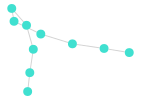

After sweep 1 energy=-19.786587244619117  maxlinkdim=4 maxerr=0.00E+00 time=0.008
After sweep 2 energy=-20.029695641430006  maxlinkdim=16 maxerr=0.00E+00 time=0.017
After sweep 3 energy=-20.0298156478083  maxlinkdim=32 maxerr=0.00E+00 time=0.016
After sweep 4 energy=-20.029815648025195  maxlinkdim=32 maxerr=0.00E+00 time=0.019
After sweep 5 energy=-20.029815648025174  maxlinkdim=32 maxerr=0.00E+00 time=0.019
After sweep 6 energy=-20.029815648025185  maxlinkdim=32 maxerr=0.00E+00 time=0.015
After sweep 7 energy=-20.02981564802517  maxlinkdim=32 maxerr=0.00E+00 time=0.018
After sweep 8 energy=-20.029815648025174  maxlinkdim=32 maxerr=0.00E+00 time=0.011
After sweep 9 energy=-20.029815648025203  maxlinkdim=32 maxerr=0.00E+00 time=0.013
After sweep 10 energy=-20.02981564802517  maxlinkdim=32 maxerr=0.00E+00 time=0.018

Ground state energy from DMRG (chain): -20.02981564802517
Time taken for DMRG (chain): 0.156224542 seconds

Ground state energy from exact diagonalisation: -20.0298156480251

In [152]:
# compare to original ground state - this is the case where we have a chain

N = 10
Χ = 1000 # bond dimension
J = 1.0 # coupling constant
Δ = 1.5 # anisotropy parameter


adj_mat = generate_chain_adjacency_matrix(N)
display(adj_mat)
plot_adjacency_matrix(adj_mat)

ψ0_chain, sites_chain = create_MPS(N, Χ)

H_chain = create_XXZ_Ham_MPO(N, adj_mat, Δ, sites_chain)
dmrg_time = @elapsed E_chain, ψ_chain = dmrg(H_chain, ψ0_chain, sweeps)
print("\n")
println("Ground state energy from DMRG (chain): $E_chain")
println("Time taken for DMRG (chain): $dmrg_time seconds\n")

# compare to exact diagonalisation
exact_time = @elapsed begin
    test_hamiltonian = get_xxz_hamiltonian(N, J, Δ)
    eigens = eigen(test_hamiltonian)
    eigenvalues = eigens.values
    ground_state = minimum(eigenvalues)
end
println("Ground state energy from exact diagonalisation: $ground_state")
println("Time taken for exact diagonalisation: $exact_time seconds\n")

# Difference
println("Difference between DMRG and exact diagonalisation: $(E_chain - ground_state)")
println("Relative difference: $((E_chain - ground_state)/ground_state)")
# It should be very small, on the order of 1E-10 or less

println("DMRG is $(exact_time/dmrg_time) times faster than exact diagonalisation for N=$N")


We can plot a graph of DMRG_time/exact_time for increasing N. We wouldm

In [169]:
using Plots

# We can plot a graph of DMRG_time/exact_time for increasing N.
# want to do this on a logarithmic scale for the y-axis
function plot_dmrg_vs_exact_time(N_values, dmrg_times, exact_times)
    relative_times = dmrg_times ./ exact_times
    # plot a straight line at y=1 for reference
    plot(N_values, relative_times, marker=:o, xlabel="Number of Sites (N)", ylabel="DMRG Time / Exact Time", title="DMRG vs Exact Diagonalisation Time", label=nothing, yscale=:log10)
    plot!([minimum(N_values), maximum(N_values)], [1, 1], linestyle=:dash, color=:red, label="DMRG time = Exact time")
end

plot_dmrg_vs_exact_time (generic function with 1 method)

N=2: DMRG time = 0.00452125 s, Exact time = 4.4917e-5 s, Speedup = 0.009934641968482167x
N=3: DMRG time = 0.007978125 s, Exact time = 3.4541e-5 s, Speedup = 0.004329463376419897x
N=4: DMRG time = 0.020667334 s, Exact time = 7.9166e-5 s, Speedup = 0.0038304892154933964x
N=5: DMRG time = 0.027930958 s, Exact time = 0.000307083 s, Speedup = 0.010994359735172706x
N=6: DMRG time = 0.052378375 s, Exact time = 0.0009 s, Speedup = 0.01718266364697263x
N=7: DMRG time = 0.063163625 s, Exact time = 0.005070583 s, Speedup = 0.08027694737279566x
N=8: DMRG time = 0.271983958 s, Exact time = 0.020858458 s, Speedup = 0.07669003037304133x
N=9: DMRG time = 0.121909166 s, Exact time = 0.100696459 s, Speedup = 0.8259957992002013x
N=10: DMRG time = 0.150754458 s, Exact time = 0.390174333 s, Speedup = 2.5881445774558784x
N=11: DMRG time = 0.192566209 s, Exact time = 2.373355083 s, Speedup = 12.32487826044288x
N=12: DMRG time = 0.249963541 s, Exact time = 10.59451675 s, Speedup = 42.384248149213086x
DMRG bec

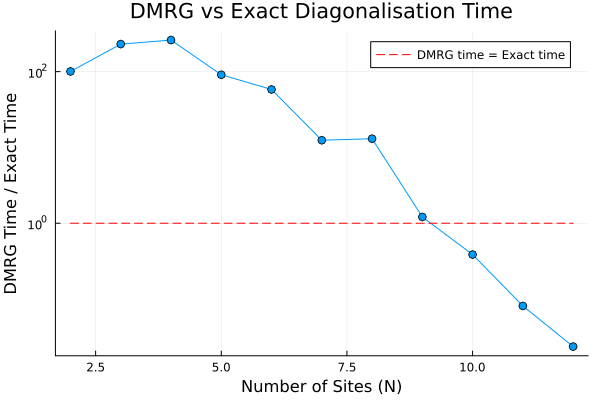

In [170]:
# we need to generate data for increasing N

N_values = 2:12
dmrg_times = Float64[]
exact_times = Float64[]

for N in N_values
    Χ = 1000 # bond dimension
    J = 1.0 # coupling constant
    Δ = 1.5 # anisotropy parameter

    adj_mat = generate_chain_adjacency_matrix(N)
    ψ0_chain, sites_chain = create_MPS(N, Χ)
    H_chain = create_XXZ_Ham_MPO(N, adj_mat, Δ, sites_chain)

    dmrg_time = @elapsed E_chain, ψ_chain = dmrg(H_chain, ψ0_chain, sweeps; outputlevel=0)

    exact_time = @elapsed begin
        test_hamiltonian = get_xxz_hamiltonian(N, J, Δ)
        eigens = eigen(test_hamiltonian)
        eigenvalues = eigens.values
        ground_state = minimum(eigenvalues)
    end

    push!(dmrg_times, dmrg_time)
    push!(exact_times, exact_time)

    println("N=$N: DMRG time = $dmrg_time s, Exact time = $exact_time s, Speedup = $(exact_time/dmrg_time)x")
end

first_dmrg_faster = nothing
for i in N_values
    if dmrg_times[i-1] < exact_times[i-1]
        first_dmrg_faster = i
        break
    end
end

println("DMRG becomes faster than exact diagonalisation at N=$first_dmrg_faster")

plot_dmrg_vs_exact_time(N_values, dmrg_times, exact_times)


We can see that for roughly $N<10$, DMRG is actually slower, presumably because of overhead. 

We can see after this, we get a roughly linear line. Hence:

$$\log \frac{t_{\text{DMRG}}}{t_{\text{exact}}} = -m N \implies t_\text{DMRG} \propto t_{\text{exact}} 10^{-N} \quad \text{for} \: N\geq10$$

i.e. an exponential speedup. 